## Import needed packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Reading dataset

In [2]:
df = pd.read_csv('../data/uber.csv')
df.head(10)


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
5,44470845,2011-02-12 02:27:09.0000006,4.9,2011-02-12 02:27:09 UTC,-73.969019,40.755910,-73.969019,40.755910,1
6,48725865,2014-10-12 07:04:00.0000002,24.5,2014-10-12 07:04:00 UTC,-73.961447,40.693965,-73.871195,40.774297,5
7,44195482,2012-12-11 13:52:00.00000029,2.5,2012-12-11 13:52:00 UTC,0.000000,0.000000,0.000000,0.000000,1
8,15822268,2012-02-17 09:32:00.00000043,9.7,2012-02-17 09:32:00 UTC,-73.975187,40.745767,-74.002720,40.743537,1
9,50611056,2012-03-29 19:06:00.000000273,12.5,2012-03-29 19:06:00 UTC,-74.001065,40.741787,-73.963040,40.775012,1


**The dataset contains the following fields:**

- <i>key</i> : a unique identifier for each trip

- <i>fare_amount</i> : the cost of each trip in usd

- <i>pickup_datetime</i> : date and time when the meter was engaged

- <i>passenger_count</i> : the number of passengers in the vehicle (driver entered value)

- <i>pickup_longitude</i> : the longitude where the meter was engaged

- <i>pickup_latitude</i> : the latitude where the meter was engaged

- <i>dropoff_longitude</i> : the longitude where the meter was disengaged

- <i>dropoff_latitude</i> : the latitude where the meter was disengaged

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [4]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], format='%Y-%m-%d %H:%M:%S %Z')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   Unnamed: 0         200000 non-null  int64              
 1   key                200000 non-null  object             
 2   fare_amount        200000 non-null  float64            
 3   pickup_datetime    200000 non-null  datetime64[ns, UTC]
 4   pickup_longitude   200000 non-null  float64            
 5   pickup_latitude    200000 non-null  float64            
 6   dropoff_longitude  199999 non-null  float64            
 7   dropoff_latitude   199999 non-null  float64            
 8   passenger_count    200000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(2), object(1)
memory usage: 13.7+ MB


In [6]:
df.loc[:,'pickup_longitude':'dropoff_latitude'] = df.loc[:,'pickup_longitude':'dropoff_latitude'].replace(to_replace=0,value=np.nan)
df = df.dropna()

In [7]:
df = df.drop_duplicates()

In [8]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.960310e+05,196031.000000,196031.000000,196031.000000,196031.000000,196031.000000,196031.000000
mean,2.771193e+07,11.343009,-73.930055,40.705591,-73.917108,40.688590,1.685228
std,1.600944e+07,9.799572,5.449368,5.426844,8.518210,3.994266,1.388150
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.383107e+07,6.000000,-73.992268,40.736396,-73.991592,40.735265,1.000000
50%,2.774864e+07,8.500000,-73.982101,40.753287,-73.980521,40.753726,1.000000
75%,4.154481e+07,12.500000,-73.968313,40.767542,-73.965316,40.768326,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


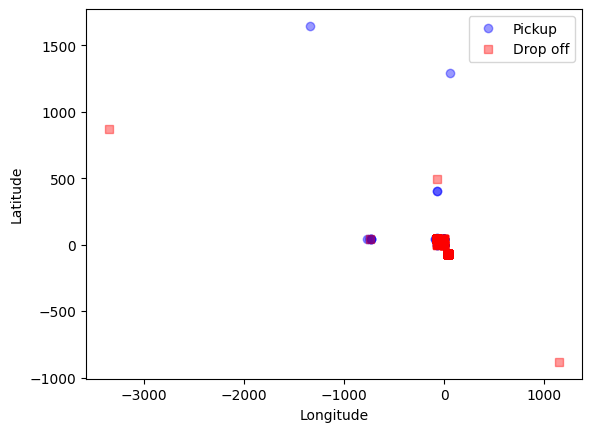

In [9]:
plt.figure()

plt.plot(df['pickup_longitude'],df['pickup_latitude'],'bo',label ='Pickup',alpha=0.4)
plt.plot(df['dropoff_longitude'],df['dropoff_latitude'],'rs',label='Drop off',alpha=0.4)

plt.legend()

plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

In [10]:
from sklearn.metrics.pairwise import haversine_distances

pickup_rad = np.radians(df[['pickup_latitude', 'pickup_longitude']])
dropoff_rad = np.radians(df[['dropoff_latitude', 'dropoff_longitude']])

distance = np.zeros(df.shape[0])

for i in np.arange(df.shape[0]):

    distance[i] = haversine_distances([pickup_rad.iloc[i,:].to_numpy() , dropoff_rad.iloc[i,:].to_numpy()])[0,1]

distance_in_km = distance * 6371

In [11]:
df['distance_in_km'] = distance_in_km
df.head(10)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_in_km
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683323
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.457590
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.036377
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661683
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.475450
5,44470845,2011-02-12 02:27:09.0000006,4.9,2011-02-12 02:27:09+00:00,-73.969019,40.755910,-73.969019,40.755910,1,0.000000
6,48725865,2014-10-12 07:04:00.0000002,24.5,2014-10-12 07:04:00+00:00,-73.961447,40.693965,-73.871195,40.774297,5,11.731015
8,15822268,2012-02-17 09:32:00.00000043,9.7,2012-02-17 09:32:00+00:00,-73.975187,40.745767,-74.002720,40.743537,1,2.332711
9,50611056,2012-03-29 19:06:00.000000273,12.5,2012-03-29 19:06:00+00:00,-74.001065,40.741787,-73.963040,40.775012,1,4.889417
10,2205147,2015-05-22 17:32:27.0000004,6.5,2015-05-22 17:32:27+00:00,-73.974388,40.746952,-73.988586,40.729805,1,2.250858


In [12]:
df['pickup_year'] = df['pickup_datetime'].dt.year
df['pickup_month'] = df['pickup_datetime'].dt.month
df['pickup_day'] = df['pickup_datetime'].dt.day
df['pickup_hr'] = df['pickup_datetime'].dt.hour
df['pickup_min'] = df['pickup_datetime'].dt.minute

In [13]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_in_km,pickup_year,pickup_month,pickup_day,pickup_hr,pickup_min
count,1.960310e+05,196031.000000,196031.000000,196031.000000,196031.000000,196031.000000,196031.000000,196031.000000,196031.000000,196031.000000,196031.000000,196031.000000,196031.000000
mean,2.771193e+07,11.343009,-73.930055,40.705591,-73.917108,40.688590,1.685228,4.773455,2011.739541,6.282272,15.705271,13.490744,29.528019
std,1.600944e+07,9.799572,5.449368,5.426844,8.518210,3.994266,1.388150,94.109955,1.858878,3.439841,8.688299,6.514438,17.337942
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000,0.000000,2009.000000,1.000000,1.000000,0.000000,0.000000
25%,1.383107e+07,6.000000,-73.992268,40.736396,-73.991592,40.735265,1.000000,1.255519,2010.000000,3.000000,8.000000,9.000000,14.000000
50%,2.774864e+07,8.500000,-73.982101,40.753287,-73.980521,40.753726,1.000000,2.156634,2012.000000,6.000000,16.000000,14.000000,30.000000
75%,4.154481e+07,12.500000,-73.968313,40.767542,-73.965316,40.768326,2.000000,3.910220,2013.000000,9.000000,23.000000,19.000000,45.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000,16409.239135,2015.000000,12.000000,31.000000,23.000000,59.000000


In [14]:
df['pickup_time'] = (df['pickup_hr']*60 + df['pickup_min']) / 60

In [15]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_in_km,pickup_year,pickup_month,pickup_day,pickup_hr,pickup_min,pickup_time
count,1.960310e+05,196031.000000,196031.000000,196031.000000,196031.000000,196031.000000,196031.000000,196031.000000,196031.000000,196031.000000,196031.000000,196031.000000,196031.000000,196031.000000
mean,2.771193e+07,11.343009,-73.930055,40.705591,-73.917108,40.688590,1.685228,4.773455,2011.739541,6.282272,15.705271,13.490744,29.528019,13.982877
std,1.600944e+07,9.799572,5.449368,5.426844,8.518210,3.994266,1.388150,94.109955,1.858878,3.439841,8.688299,6.514438,17.337942,6.521194
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000,0.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.383107e+07,6.000000,-73.992268,40.736396,-73.991592,40.735265,1.000000,1.255519,2010.000000,3.000000,8.000000,9.000000,14.000000,9.400000
50%,2.774864e+07,8.500000,-73.982101,40.753287,-73.980521,40.753726,1.000000,2.156634,2012.000000,6.000000,16.000000,14.000000,30.000000,14.633333
75%,4.154481e+07,12.500000,-73.968313,40.767542,-73.965316,40.768326,2.000000,3.910220,2013.000000,9.000000,23.000000,19.000000,45.000000,19.500000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000,16409.239135,2015.000000,12.000000,31.000000,23.000000,59.000000,23.983333


<Figure size 640x480 with 0 Axes>

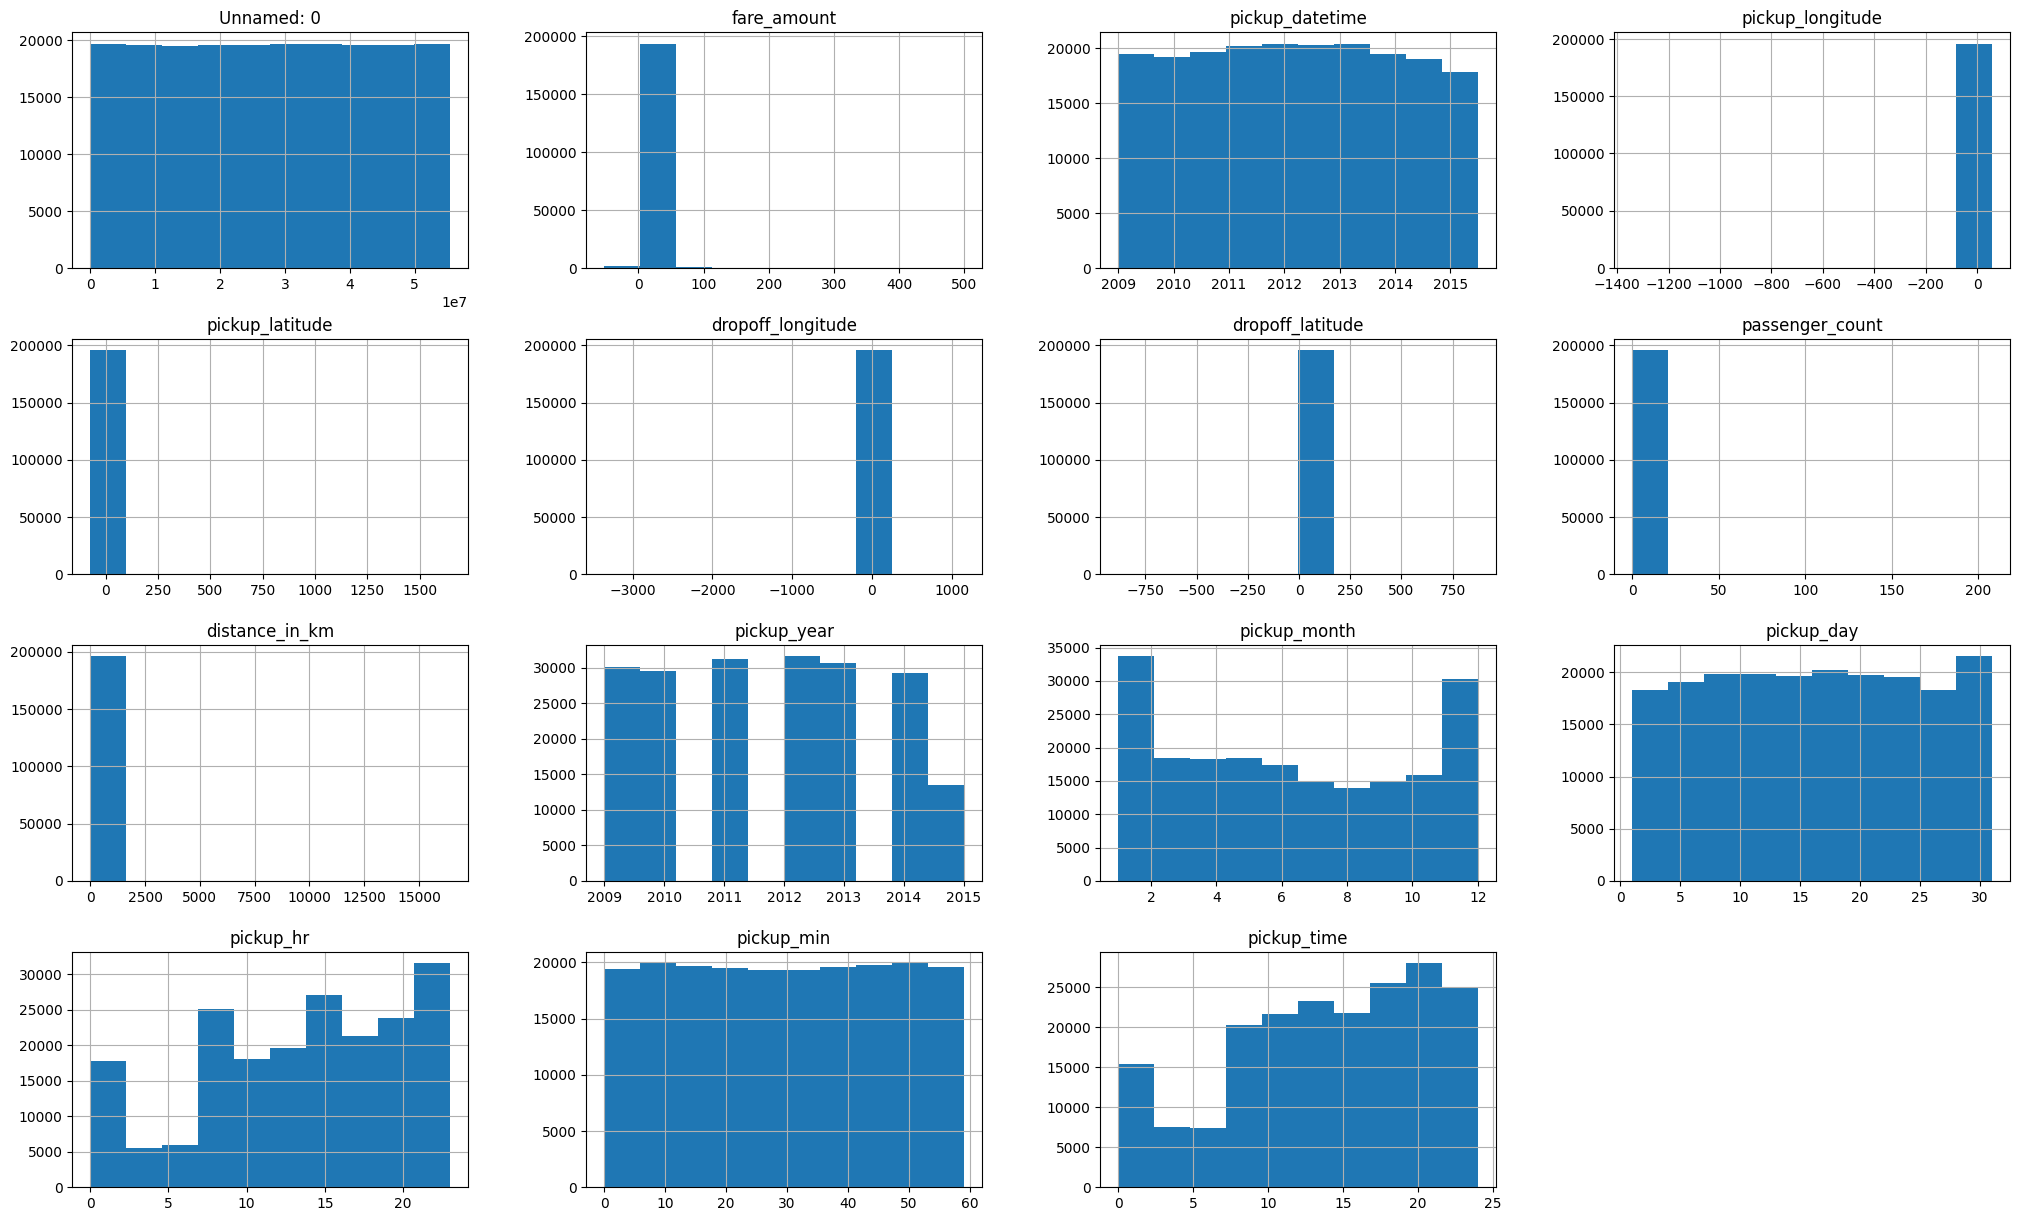

In [16]:
plt.figure()
df.hist(figsize=(25, 15));

In [17]:
df = df[['fare_amount', 'distance_in_km', 'pickup_datetime', 'pickup_time']]

df = df[(df['distance_in_km'] <= 20) & (df['distance_in_km'] >= 0.05)]
df = df[df['fare_amount'] >= 1]
df = df[df['fare_amount'] <= 100 ]

In [18]:
df.describe()

,fare_amount,distance_in_km,pickup_time
count,190606.000000,190606.000000,190606.000000
mean,10.783571,3.139972,13.984507
std,8.097859,2.976331,6.530378
min,2.500000,0.050318,0.000000
25%,6.000000,1.281081,9.400000
50%,8.500000,2.162356,14.633333
75%,12.500000,3.846678,19.533333
max,100.000000,19.998309,23.983333


<Figure size 640x480 with 0 Axes>

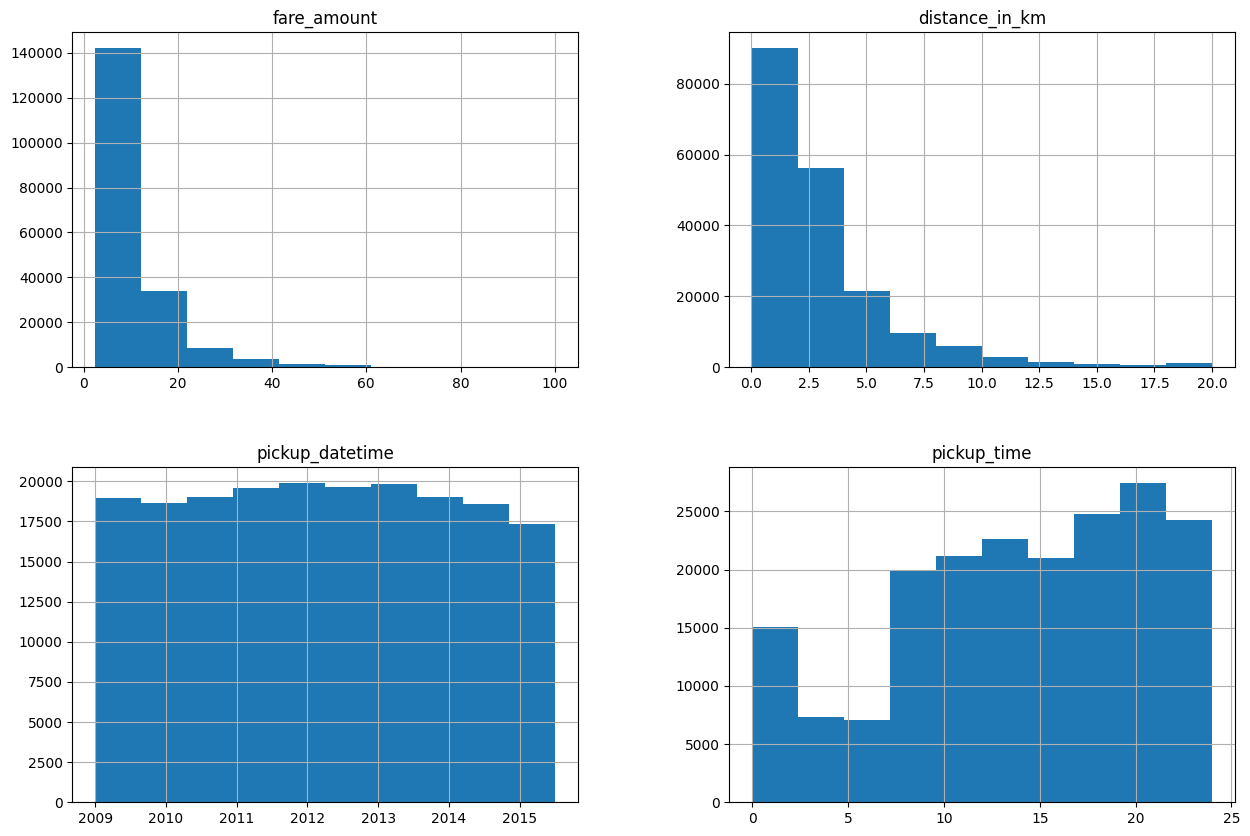

In [19]:
plt.figure()
df.hist(figsize=(15, 10));

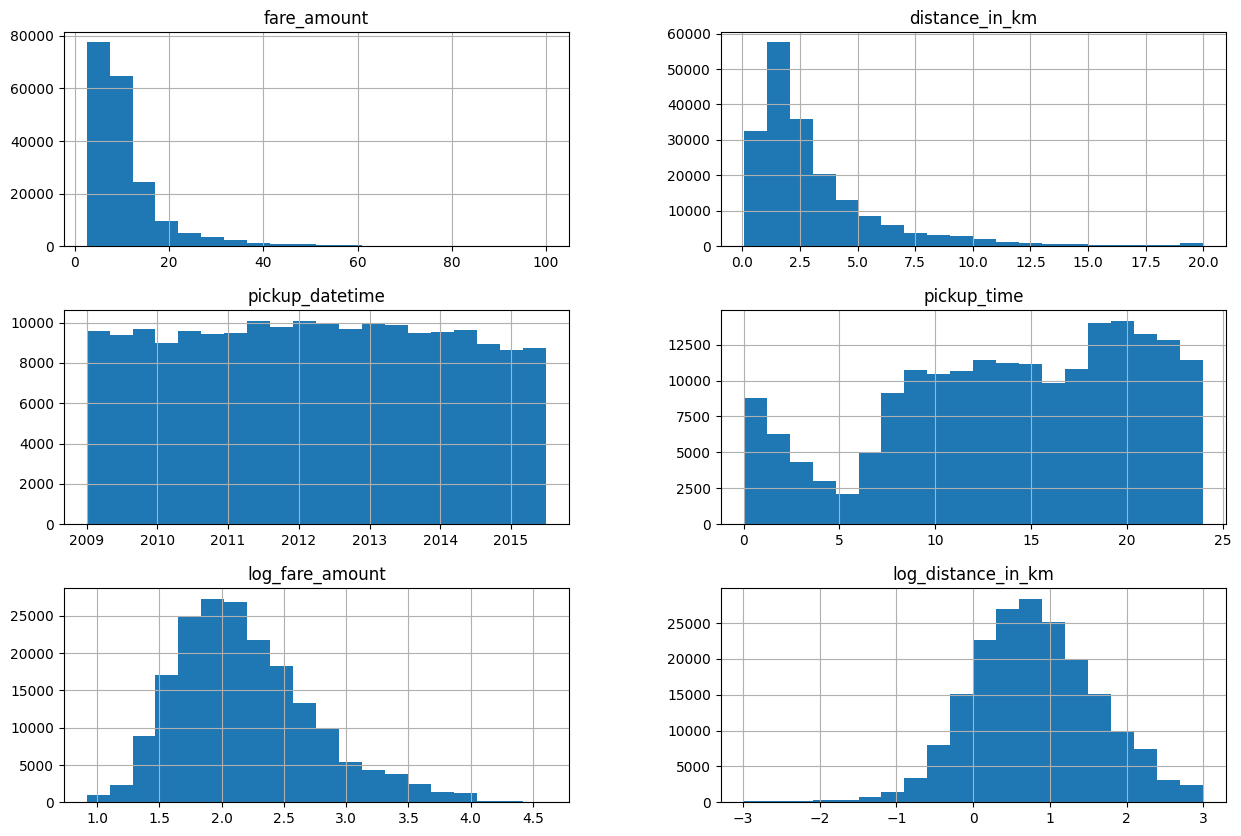

In [20]:
df['log_fare_amount'] = np.log(df['fare_amount'])
df['log_distance_in_km'] = np.log(df['distance_in_km'])

df.hist(figsize=(15, 10), bins=20);

In [21]:
df = df.drop(['fare_amount', 'distance_in_km'], axis=1)


In [22]:
df.head()


,pickup_datetime,pickup_time,log_fare_amount,log_distance_in_km
0,2015-05-07 19:52:06+00:00,19.866667,2.014903,0.520770
1,2009-07-17 20:04:56+00:00,20.066667,2.041220,0.899181
2,2009-08-24 21:45:00+00:00,21.750000,2.557227,1.616687
3,2009-06-26 08:22:21+00:00,8.366667,1.667707,0.507831
4,2014-08-28 17:47:00+00:00,17.783333,2.772589,1.498607


In [23]:
df['is_weekend'] = df['pickup_datetime'].dt.day_of_week > 4
df = df.drop(['pickup_datetime'], axis = 1)
df = df.reset_index(drop=True)

In [24]:
df['is_weekend'] = df['is_weekend'].astype('int')

<Axes: >

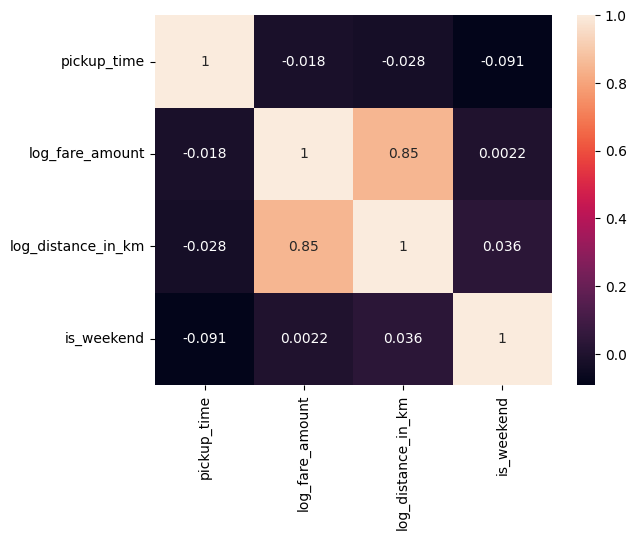

In [25]:
plt.figure()
sns.heatmap(df.corr(), annot=True)

In [26]:
df.head()

,pickup_time,log_fare_amount,log_distance_in_km,is_weekend
0,19.866667,2.014903,0.520770,0
1,20.066667,2.041220,0.899181,0
2,21.750000,2.557227,1.616687,0
3,8.366667,1.667707,0.507831,0
4,17.783333,2.772589,1.498607,0


# Modeling

In [27]:
X = df.drop('log_fare_amount', axis=1)
y = df['log_fare_amount']

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.05, shuffle=True, random_state=42, stratify=df['is_weekend']
)

In [29]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

### Normalization

In [30]:
from sklearn.preprocessing import MinMaxScaler

normal_scalar = MinMaxScaler()
X_train_n = normal_scalar.fit_transform(X_train.drop('is_weekend', axis=1))


In [31]:
X_train_n = pd.DataFrame(X_train_n, columns=X_train.drop(['is_weekend'], axis=1).columns)
X_train_n = pd.concat([X_train_n, X_train['is_weekend']], axis=1)
X_train = X_train_n

In [32]:
X_test_n = normal_scalar.transform(X_test.drop(['is_weekend'], axis=1))
X_test_n = pd.DataFrame(X_test_n, columns=X_test.drop(['is_weekend'], axis=1).columns)
X_test_n = pd.concat([X_test_n, X_test['is_weekend']], axis=1)
X_test = X_test_n

### Decision Tree

In [47]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeRegressor(random_state=42)
params = {'max_depth': [3, 4, 5, 6, 7, 8],
          'min_samples_split': [3, 4, 5, 6, 7, 8],
          'min_samples_leaf': [13, 14, 15, 16, 17, 18, 19]}

grid = GridSearchCV(estimator=dt, param_grid=params, cv=3, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [13, 14, 15, 16, 17, 18, 19],
                         'min_samples_split': [3, 4, 5, 6, 7, 8]},
             scoring='neg_mean_squared_error')

In [48]:
grid.best_params_

{'max_depth': 8, 'min_samples_leaf': 19, 'min_samples_split': 3}

In [49]:
grid.best_score_

-0.06876018984024108

In [50]:
grid.best_estimator_

DecisionTreeRegressor(max_depth=8, min_samples_leaf=19, min_samples_split=3,
                      random_state=42)

In [39]:
best_dt = grid.best_estimator_

In [51]:
yhat_train = best_dt.predict(X_test)